In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
from scipy import stats
import json
import random
import sys
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import math

## Load Data
inspired by Timos work :)

In [2]:
def read_json_objects_from_file(file_path):
    with open(file_path, 'r') as file:
        file_content = file.read()
        # Split the content based on semicolons
        json_objects = file_content.split(';')
        # Remove any leading or trailing whitespaces from each JSON object
        json_objects = [json_object.strip() for json_object in json_objects]
        # Init output list
        data_list = []
        # Parse each JSON object
        for index, json_object in enumerate(json_objects):
            try:
                # Load JSON object
                data = json.loads(json_object)
                data_list.append(data)
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON object {index}: {e}")
                
        return data_list



In [3]:
path_tue = 'Data/satellite_above_tübingen_90.txt'
path_rome = 'Data/satellite_above_rome_90.txt'

# ROME
data_list_rome = read_json_objects_from_file(path_rome)
n_samples_rome = len(data_list_rome)

#n = 100
n_samples = len(data_list_rome)
sample_idx = np.arange(n_samples)
random_indices = np.random.choice(sample_idx, size=n_samples)

lats_rome = []
longs_rome = []
dfs_rome = []

for idx in random_indices:
    data_rome = data_list_rome[idx]
    df_rome = pd.DataFrame(data_rome['above'])
    lats_rome.append(df_rome['satlat'])
    longs_rome.append(df_rome['satlng'])
    dfs_rome.append(df_rome)

data_rome = pd.concat(dfs_rome, axis=0)
data_rome.info()

# TUEBINGEN
data_list_tue = read_json_objects_from_file(path_tue)
n_samples_tue = len(data_list_tue)

lats_tue = []
longs_tue = []
alts_tue = []
dfs_tue = []

for idx in random_indices:
    data_tue = data_list_tue[idx]
    df_tue = pd.DataFrame(data_tue['above'])
    lats_tue.append(df_tue['satlat'])
    longs_tue.append(df_tue['satlng'])
    alts_tue.append(df_tue['satalt'])
    dfs_tue.append(df_tue)
    
data_tue = pd.concat(dfs_tue, axis=0)
data_tue.info()

Error decoding JSON object 47: Expecting value: line 1 column 1 (char 0)
<class 'pandas.core.frame.DataFrame'>
Index: 138819 entries, 0 to 3029
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   satid          138819 non-null  int64  
 1   satname        138819 non-null  object 
 2   intDesignator  138819 non-null  object 
 3   launchDate     138819 non-null  object 
 4   satlat         138819 non-null  float64
 5   satlng         138819 non-null  float64
 6   satalt         138819 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 8.5+ MB
Error decoding JSON object 48: Expecting value: line 1 column 1 (char 0)
<class 'pandas.core.frame.DataFrame'>
Index: 144540 entries, 0 to 3109
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   satid          144540 non-null  int64  
 1   satname        144540 non-null  object 
 

## PLOTS

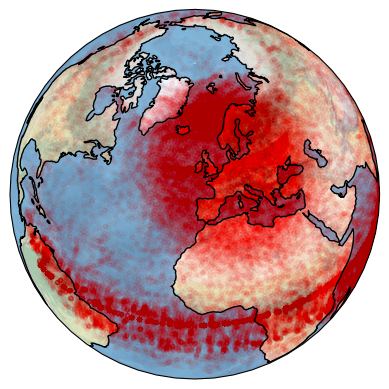

In [4]:
# TÜBINGEN
data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
#ax.set_extent([-50, 50, 20, 90], crs=ccrs.PlateCarree())
ax.scatter(np.array(data_tue['satlng']), np.array(data_tue['satlat']), alpha=.01, c='r', marker='.', transform=data_crs)
# for lat, long in zip(lats_tue, longs_tue):
#     ax.scatter(long, lat, alpha=.01, color='r', marker='.', transform=data_crs)


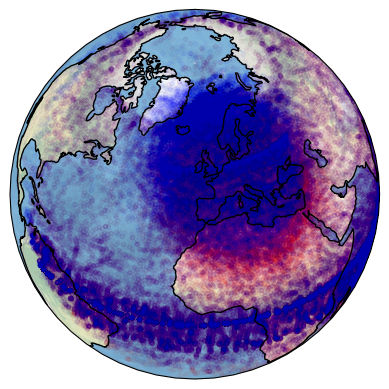

In [5]:
# ROME
data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
#ax.set_extent([-50, 50, 20, 90], crs=ccrs.PlateCarree())
for lat, long in zip(lats_rome, longs_rome):
    ax.scatter(long, lat, alpha=.01, color='r', marker='.', transform=data_crs)

# TÜBINGEN
for lat, long in zip(lats_tue, longs_tue):
    plt.scatter(long, lat, alpha=.01, color='b', marker='.', transform=data_crs)


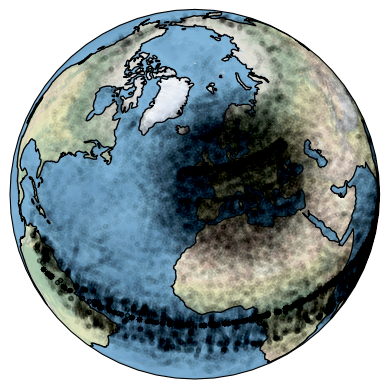

In [6]:
# COMMON
dfs_common = []
lats_common = []
longs_common = []

for idx in random_indices:
    data_t = data_list_tue[idx]
    df_t = pd.DataFrame(data_t['above'])
    data_r = data_list_rome[idx]
    df_r = pd.DataFrame(data_r['above'])
    df_common = df_r.loc[df_r['satid'].isin(df_t['satid'])]
    lats_common.append(df_common['satlat'])
    longs_common.append(df_common['satlng'])
    dfs_common.append(df_common)

data_common = pd.concat(dfs_common, axis=0)

ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
#ax.set_extent([-50, 50, 20, 90], crs=ccrs.PlateCarree())
for lat, long in zip(lats_common, longs_common):
    ax.scatter(long, lat, alpha=.01, color='k', marker='.', transform = data_crs)

plt.show()

Here's to why our data looks so oddly distributed:

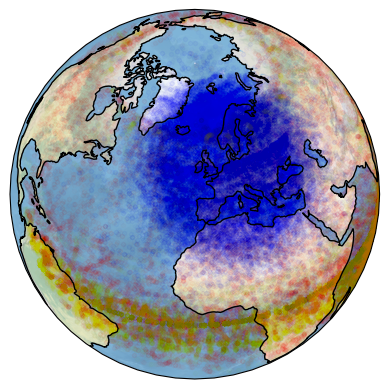

In [7]:
# satellites with altitude > 10000
data_tue_high = data_tue[(data_tue['satalt'] > 10000) & (data_tue['satalt'] < 35000)]
# satellites with altitude < 10000
data_tue_low = data_tue[data_tue['satalt'] < 10000]
# satellites with altitude > 20000
data_tue_higher = data_tue[data_tue['satalt'] > 35000]

data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
ax.scatter(np.array(data_tue_high['satlng']), np.array(data_tue_high['satlat']), alpha=.01, color='r', marker='.', transform=data_crs)
ax.scatter(np.array(data_tue_low['satlng']), np.array(data_tue_low['satlat']), alpha=.01, color='b', marker='.', transform=data_crs)
ax.scatter(np.array(data_tue_higher['satlng']), np.array(data_tue_higher['satlat']), alpha=.01, color='y', marker='.', transform=data_crs)

Plot different orbits: https://de.wikipedia.org/wiki/Satellitenorbit

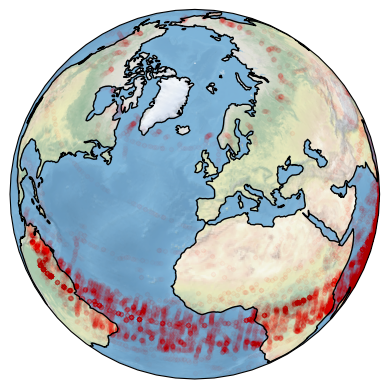

In [8]:
# LEO orbit: below 2000 km
data_tue_LEO = data_tue[data_tue['satalt'] < 2000]
# MEO orbit: 2000 - 35786 km
data_tue_MEO = data_tue[(data_tue['satalt'] >= 2000) & (data_tue['satalt'] < 35786)]
# HEO orbit: above 35786 km
data_tue_HEO = data_tue[data_tue['satalt'] >= 35786]

data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(-10, 45))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
#ax.scatter(np.array(data_tue_LEO['satlng']), np.array(data_tue_LEO['satlat']), alpha=.01, color='y', marker='.', transform=data_crs)
#ax.scatter(np.array(data_tue_MEO['satlng']), np.array(data_tue_MEO['satlat']), alpha=.01, color='b', marker='.', transform=data_crs)
ax.scatter(np.array(data_tue_HEO['satlng']), np.array(data_tue_HEO['satlat']), alpha=.01, color='r', marker='.', transform=data_crs)

1575.8545004066866
14.184108914551635
(34.598427085448364, 62.96664491455164)
(-5.007113914551635, 23.361103914551634)


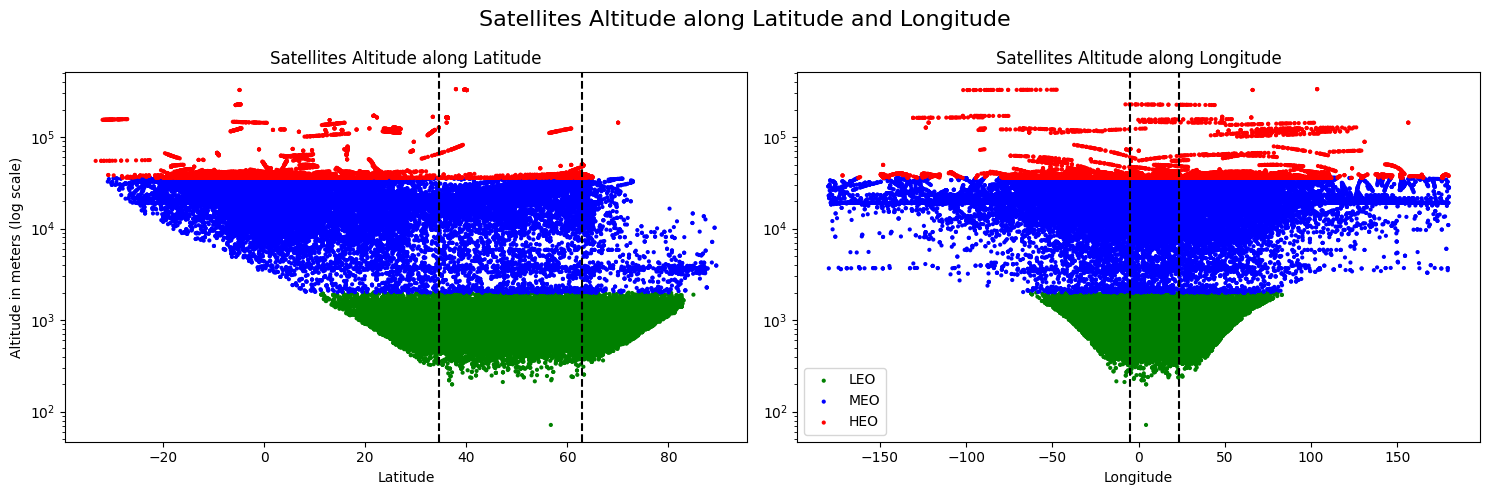

In [9]:
r = 6371 # earth radius (cancels out in the formula)
gamma = 14.172
tue_lat = 48.782536
tue_long = 9.176995
gamma_in_km = gamma * 2 * r * math.pi / 360
print(gamma_in_km)
# 1 degree of latitude is equal to 25,000 / 360 or 69.4 miles (111.1 km)
gamma_in_latlng = gamma_in_km / 111.1
print(gamma_in_latlng)
cutoff_lat = (tue_lat - gamma_in_latlng, tue_lat + gamma_in_latlng)
cutoff_lng = (tue_long - gamma_in_latlng, tue_long + gamma_in_latlng)
print(cutoff_lat)
print(cutoff_lng)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Satellites Altitude along Latitude and Longitude', fontsize=16)

ax1.scatter(data_tue_LEO['satlat'], data_tue_LEO['satalt'], color='g', marker=".", alpha=1, edgecolors="none")
ax1.scatter(data_tue_MEO['satlat'], data_tue_MEO['satalt'], color='b', marker=".", alpha=1, edgecolors="none")
ax1.scatter(data_tue_HEO['satlat'], data_tue_HEO['satalt'], color='r', marker=".", alpha=1, edgecolors="none")
# Plot vertical lines at cutoff_lat
ax1.axvline(cutoff_lat[0], color='k', linestyle='--')
ax1.axvline(cutoff_lat[1], color='k', linestyle='--')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Altitude in meters (log scale)')
ax1.set_title('Satellites Altitude along Latitude')
ax1.set_yscale('log')

ax2.scatter(data_tue_LEO['satlng'], data_tue_LEO['satalt'], color='g', marker=".", alpha=1, edgecolors="none")
ax2.scatter(data_tue_MEO['satlng'], data_tue_MEO['satalt'], color='b', marker=".", alpha=1, edgecolors="none")
ax2.scatter(data_tue_HEO['satlng'], data_tue_HEO['satalt'], color='r', marker=".", alpha=1, edgecolors="none")
# Plot vertical lines at cutoff_lat
ax2.axvline(cutoff_lng[0], color='k', linestyle='--')
ax2.axvline(cutoff_lng[1], color='k', linestyle='--')
ax2.set_xlabel('Longitude')
# ax2.set_ylabel('Altitude in meters (log scale)')
ax2.set_title('Satellites Altitude along Longitude')
ax2.set_yscale('log')
ax2.legend(['LEO', 'MEO', 'HEO'], loc='lower left')

plt.tight_layout()
plt.show()

## Extract surface where we captured all the satellites

Distance in spherical coordinates:
 ${\mathbf D} = \sqrt{r^2+r'^2-2rr'(\sin{\theta}\sin{\theta'}\cos{(\varphi-\varphi')} + \cos{\theta}\cos{\theta'})}$

 Since the latitude is 0 at the equator, we need to subtract the latitude values from 90°.
 
 We also need to transform degrees to radians for the trigonometric functions of the math library!


In [10]:
import math

def filter_data_tue(data_tue):
    # Filter by euclidean distance to Tübingen
    r = 6371 # earth radius (cancels out in the formula)
    gamma = 14.172
    gamma_in_meters = gamma * 2 * r * math.pi / 360
    tue_lat = 90 - 48.782536
    tue_long = 9.176995
    rome_lat = 41.52
    rome_long = 12.29
    
    data_tue_masked = data_tue[np.sqrt((2*r**2 - 2*r**2 *
                  ((math.sin(np.radians(tue_lat)) * data_tue['satlat'].apply(lambda x: math.sin(np.radians(90 - x))) 
                    * data_tue['satlng'].apply(lambda x: math.cos(np.radians(tue_long-x)))) 
                    + (math.cos(np.radians(tue_lat)) * data_tue['satlat'].apply(lambda x: math.cos(np.radians(90 - x))))))) <= gamma_in_meters]
    
    return data_tue_masked

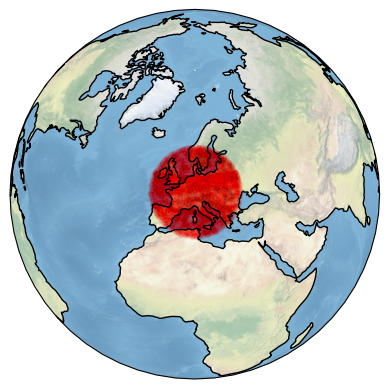

In [11]:
# Usage example:
data_tue_masked = filter_data_tue(data_tue)

# Plot
data_crs = ccrs.PlateCarree()
ax = plt.axes(projection=ccrs.Orthographic(9, 48))
ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
ax.scatter(np.array(data_tue_masked['satlng']), np.array(data_tue_masked['satlat']), alpha=.01, color='r', marker='.', transform=data_crs)

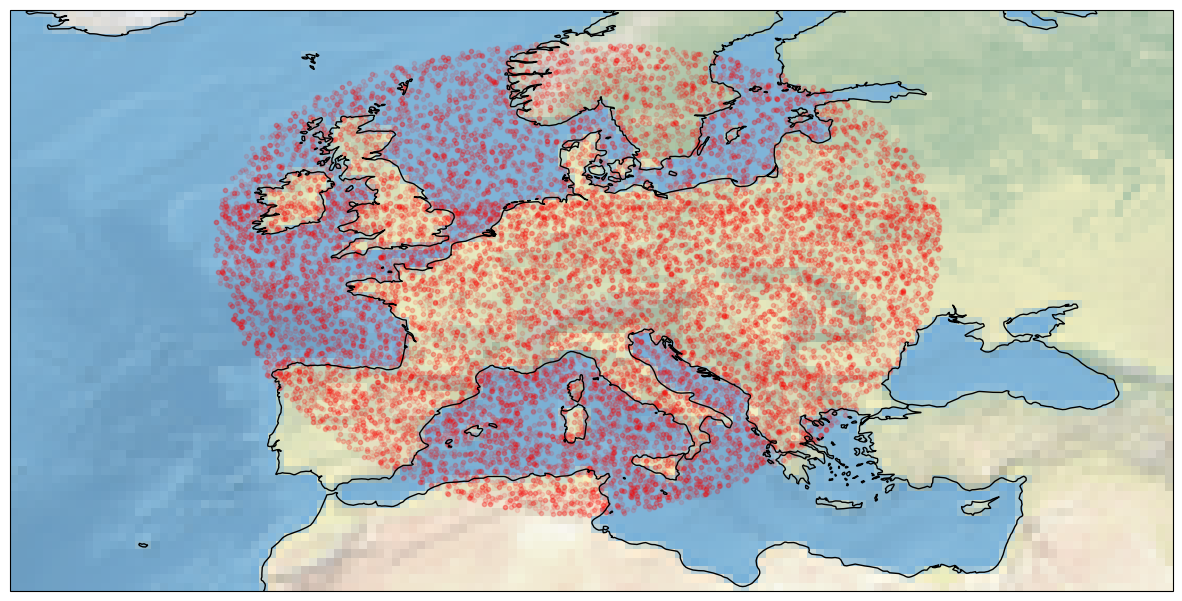

In [12]:
extend = [-25, 45, 30, 65]

# Plot
crs = ccrs.PlateCarree()
crs_globe = ccrs.Orthographic(9, 48)

fig, ax = plt.subplots(1, 1, subplot_kw={"projection":crs}, figsize=(15, 10))

lats = np.array(data_tue_masked['satlat'])
longs = np.array(data_tue_masked['satlng'])

ax.stock_img() # background image, removing it somehow cuts off the globe ?
ax.coastlines()
ax.scatter(longs, lats, alpha=.1, color='r', marker='.', transform=crs)
ax.set_extent(extend, crs=ccrs.PlateCarree())

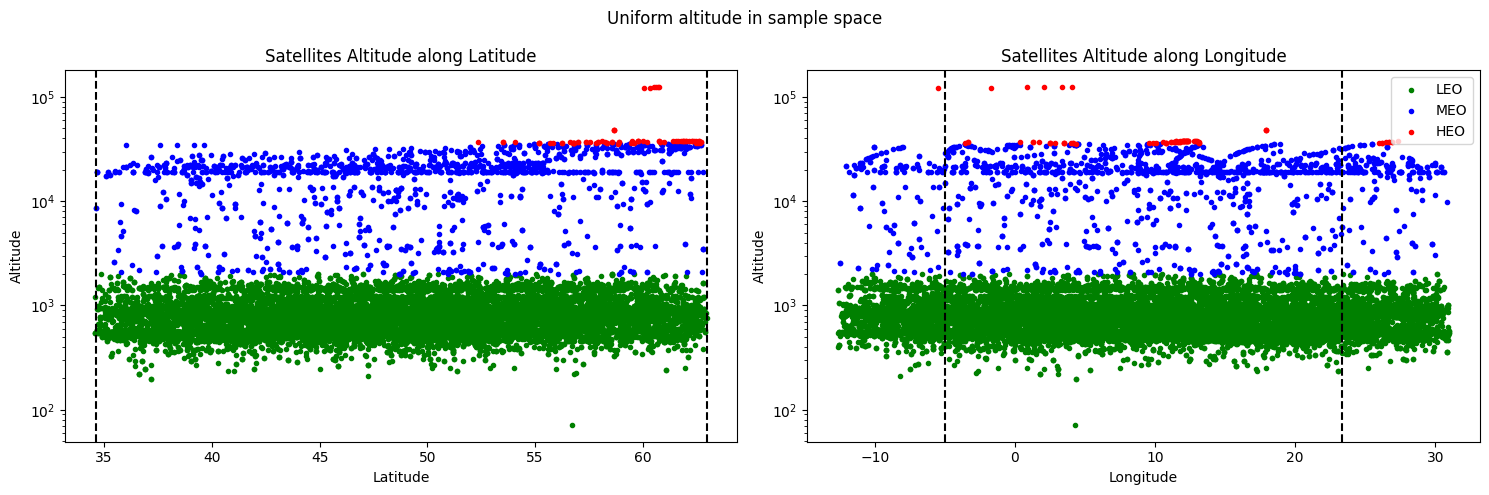

In [13]:
# LEO orbit: below 2000 km
data_tue_masked_LEO = data_tue_masked[data_tue_masked['satalt'] < 2000]
# MEO orbit: 2000 - 35786 km
data_tue_masked_MEO = data_tue_masked[(data_tue_masked['satalt'] >= 2000) & (data_tue_masked['satalt'] < 35786)]
# HEO orbit: above 35786 km
data_tue_masked_HEO = data_tue_masked[data_tue_masked['satalt'] >= 35786]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Uniform altitude in sample space')

# ax1.scatter(lats, alts)
ax1.scatter(data_tue_masked_LEO['satlat'], data_tue_masked_LEO['satalt'], color='g', marker=".")
ax1.scatter(data_tue_masked_MEO['satlat'], data_tue_masked_MEO['satalt'], color='b', marker=".")
ax1.scatter(data_tue_masked_HEO['satlat'], data_tue_masked_HEO['satalt'], color='r', marker=".")
# Plot vertical lines at cutoff_lat
ax1.axvline(cutoff_lat[0], color='k', linestyle='--')
ax1.axvline(cutoff_lat[1], color='k', linestyle='--')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Altitude')
ax1.set_title('Satellites Altitude along Latitude')
ax1.set_yscale('log')

# ax2.scatter(longs, alts)
ax2.scatter(data_tue_masked_LEO['satlng'], data_tue_masked_LEO['satalt'], color='g', marker=".")
ax2.scatter(data_tue_masked_MEO['satlng'], data_tue_masked_MEO['satalt'], color='b', marker=".")
ax2.scatter(data_tue_masked_HEO['satlng'], data_tue_masked_HEO['satalt'], color='r', marker=".")
# Plot vertical lines at cutoff_lat
ax2.axvline(cutoff_lng[0], color='k', linestyle='--')
ax2.axvline(cutoff_lng[1], color='k', linestyle='--')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Altitude')
ax2.set_title('Satellites Altitude along Longitude')
ax2.set_yscale('log')
ax2.legend(['LEO', 'MEO', 'HEO'], loc='upper right')

plt.tight_layout()
plt.show()

### Filter Satellites by categories (Starlink and more)

In [14]:
data_tue['is_starlink'] = data_tue['satname'].apply(lambda x: 1 if 'STARLINK' in x else 0)
data_tue['is_cosmos'] = data_tue['satname'].apply(lambda x: 1 if 'COSMOS' in x else 0)
data_tue['is_usa'] = data_tue['satname'].apply(lambda x: 1 if 'USA' in x else 0)
# data_tue.info()
print(data_tue['is_starlink'].value_counts())
print(data_tue['is_cosmos'].value_counts())
print(data_tue['is_usa'].value_counts())

data_tue_starlink = data_tue[data_tue['is_starlink'] == 1]
data_tue_cosmos = data_tue[data_tue['is_cosmos'] == 1]
data_tue_usa = data_tue[data_tue['is_usa'] == 1]

is_starlink
0    132417
1     12123
Name: count, dtype: int64
is_cosmos
0    127998
1     16542
Name: count, dtype: int64
is_usa
0    140061
1      4479
Name: count, dtype: int64


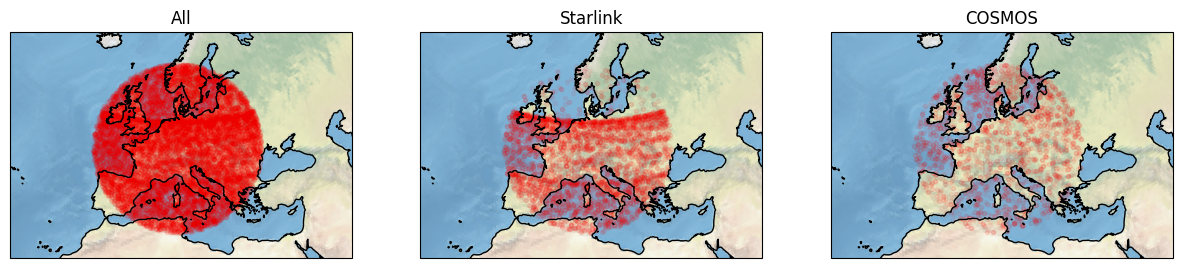

In [15]:
# Usage example:
data_tue_starlink_masked = filter_data_tue(data_tue_starlink)
data_tue_cosmos_masked = filter_data_tue(data_tue_cosmos)
data_tue_usa_masked = filter_data_tue(data_tue_usa)

categories = {
    "All": data_tue_masked,
    "Starlink": data_tue_starlink_masked, 
    "COSMOS": data_tue_cosmos_masked, 
    # "USA": data_tue_usa_masked
    }

# Plot
fig, axs = plt.subplots(
    1, len(categories), 
    subplot_kw={'projection': ccrs.Orthographic(9, 48)},
    figsize=(15, 5))

data_crs = ccrs.PlateCarree()

for i, category in enumerate(categories.values()):
    lats = np.array(category['satlat'])
    longs = np.array(category['satlng'])
    axs[i].stock_img() # background image, removing it somehow cuts off the globe ?
    axs[i].coastlines()
    axs[i].set_extent(extend, crs=ccrs.PlateCarree())
    axs[i].scatter(longs, lats, alpha=.05, color='r', marker='.', transform=data_crs)
    axs[i].set_title(list(categories.keys())[i])
    
plt.show()

## First try for a kernel density estimate
creates a dramatic looking plot, inspired by https://ipython-books.github.io/76-estimating-a-probability-distribution-nonparametrically-with-a-kernel-density-estimation/

In [16]:
# Color map
cmap = plt.get_cmap('CMRmap')
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:, -1] = np.linspace(0, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

In [17]:
def kernel_density(lats, longs, projection, k, extend):
    geo = ccrs.Geodetic()

    h = projection.transform_points(geo, lats, longs)[:, :2].T

    kde = stats.gaussian_kde(h)

    # Coordinates of the four corners of the map.
    x0, x1, y0, y1 = extend
    # Create the grid.
    tx, ty = np.meshgrid(np.linspace(x0, x1, 2 * k),
                        np.linspace(y0, y1, k))
    # Reshape the grid for the kde() function.
    mesh = np.vstack((tx.ravel(), ty.ravel()))
    # Evaluate the kde() function on the grid.
    v = kde(mesh).reshape((k, 2 * k))
    # output is reshaped to grid mesh shape
    
    return v

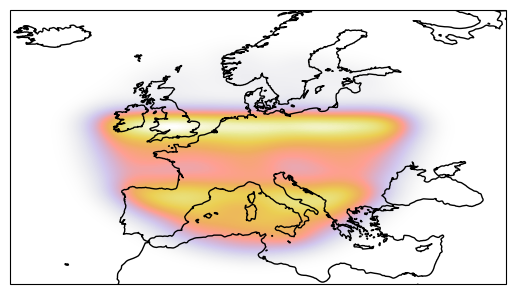

In [18]:
# lats = np.array(np.array(data_tue_masked['satlng'])) 
# longs = np.array(np.array(data_tue_masked['satlat']))

longs = np.array(data_tue_starlink_masked['satlng'])
lats = np.array(data_tue_starlink_masked['satlat'])

# lats = np.array(np.array(data_tue_cosmos_masked['satlng']))
# longs = np.array(np.array(data_tue_cosmos_masked['satlat']))

# lats = np.array(np.array(data_tue_usa_masked['satlng']))
# longs = np.array(np.array(data_tue_usa_masked['satlat']))

extend = [-25, 45, 30, 65]
k = 100
crs = ccrs.PlateCarree()
crs_round = ccrs.Orthographic(9, 48)

v = kernel_density(longs, lats, projection=crs, k=k, extend=extend)

# Plot the heat map
ax = plt.axes(projection=crs)
ax.coastlines()
ax.set_extent(extend)
# ax.stock_img() # Add a stock background image
# ax.scatter(lats, longs, s=1, alpha=0.5, c='k')
ax.imshow(v, origin='lower',
        extent=extend,
        interpolation='bilinear',
        cmap=my_cmap)


(100, 200)


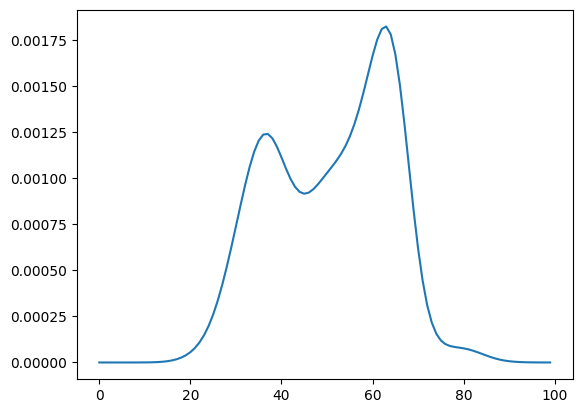

In [30]:
type(v)
print(v.shape)

plt.plot(np.arange(100), v[:, 50])


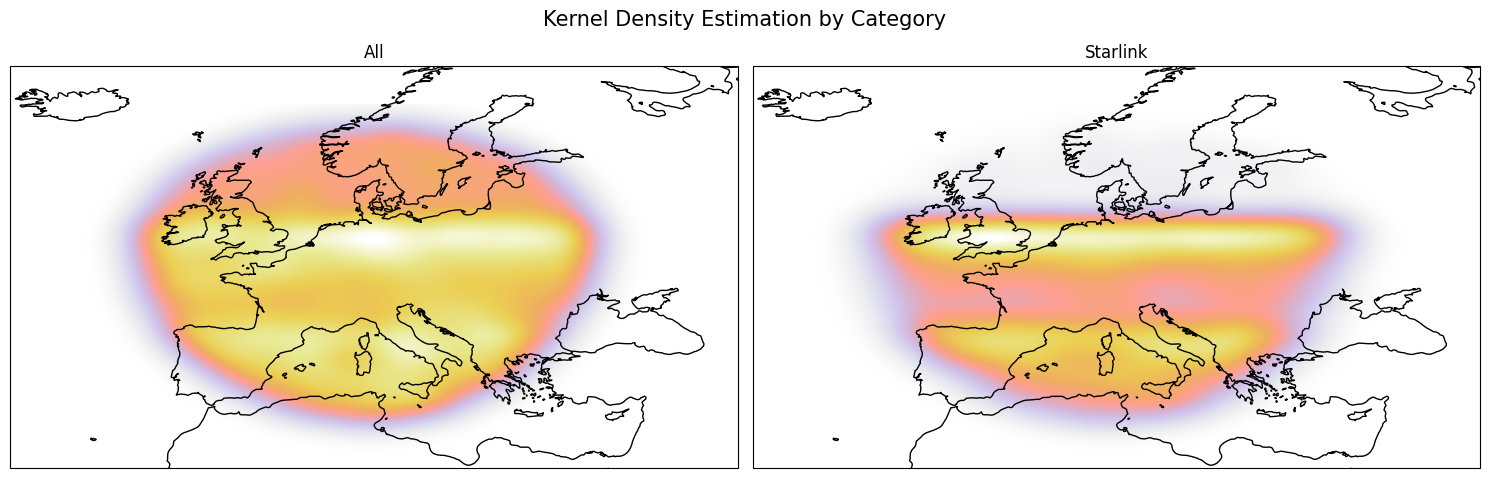

In [19]:
# data
categories = {
    "All": data_tue_masked,
    "Starlink": data_tue_starlink_masked, 
    # "COSMOS": data_tue_cosmos_masked, 
    # "USA": data_tue_usa_masked
}

# kde variables
extend = [-25, 45, 30, 65]
k = 100
crs = ccrs.PlateCarree()

# Plot
fig, axs = plt.subplots(
    1, 2, 
    subplot_kw={'projection': crs},
    figsize=(15, 5))
axs.flatten()
fig.suptitle("Kernel Density Estimation by Category", fontsize=15)

for i, category in enumerate(categories.values()):
    
    # Calculate the kernel density estimate for each category
    lats = np.array(category['satlat'])
    longs = np.array(category['satlng'])
    v = kernel_density(longs, lats, projection=crs, k=k, extend=extend)

    # axs[i].stock_img() 
    axs[i].coastlines()
    axs[i].set_extent(extend)
    axs[i].set_title(list(categories.keys())[i])
    axs[i].imshow(
        v, origin='lower', extent=extend, interpolation='bilinear', cmap=my_cmap
    )

plt.tight_layout()
plt.show()

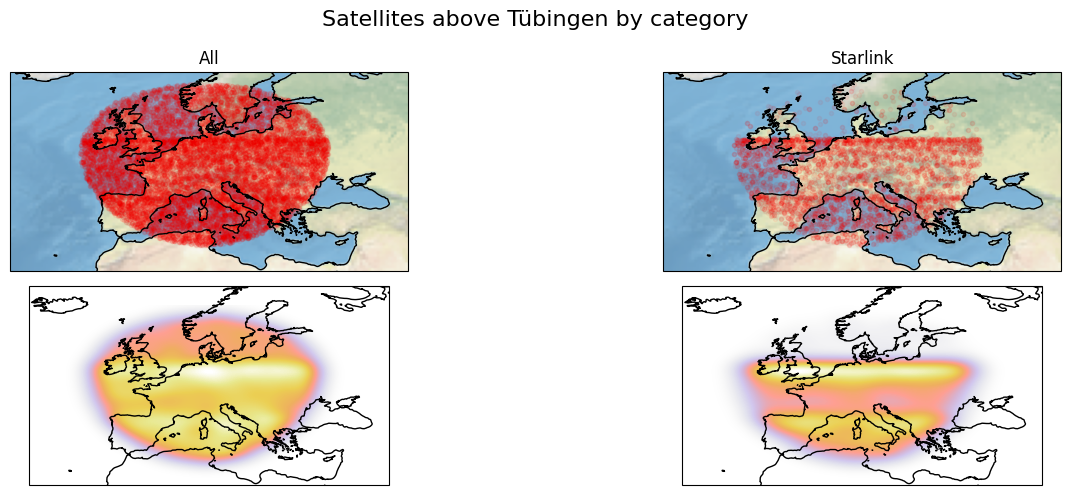

In [20]:
# data
categories = {
    "All": data_tue_masked,
    "Starlink": data_tue_starlink_masked, 
    # "COSMOS": data_tue_cosmos_masked, 
    # "USA": data_tue_usa_masked
}

# kde variables
extend = [-25, 45, 30, 65]
k = 100
crs = ccrs.PlateCarree()

# Plot
fig, axs = plt.subplots(
    2, 2, 
    subplot_kw={'projection': crs},
    figsize=(15, 5))
# axs.flatten()
fig.suptitle("Satellites above Tübingen by category", fontsize=16)

data_crs = ccrs.PlateCarree()
for i, category in enumerate(categories.values()):
    lats = np.array(category['satlat'])
    longs = np.array(category['satlng'])
    
    # Plot point clouds
    axs[0][i].stock_img() 
    axs[0][i].coastlines()
    axs[0][i].scatter(longs, lats, alpha=.05, color='r', marker='.', transform=crs)
    axs[0][i].set_extent(extend, crs=crs)
        
    # Plot KDE
    v = kernel_density(longs, lats, projection=crs, k=k, extend=extend)
    axs[1][i].coastlines()
    axs[1][i].set_extent(extend)
    axs[1][i].imshow(
        v, origin='lower', extent=extend, interpolation='bilinear', cmap=my_cmap
    )
    
    # Set titles and axis labels
    axs[0][i].set_title(list(categories.keys())[i])
    
axs[0][0].set_ylabel("Sample Points")
axs[0][1].set_ylabel("Kernel Density Estimation")
    
plt.tight_layout()
plt.show()

In [21]:
# proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=50.0)
# ax = plt.axes(projection=proj)
# ax.add_feature(cartopy.feature.LAND)
# ax.add_feature(cartopy.feature.OCEAN)
# ax.add_feature(cartopy.feature.COASTLINE) #, edgecolor="brown")
# ax.gridlines()
# plt.tight_layout()
# plt.show() ; plt.close()
